# RNN Functional

In [148]:
import glob
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

model_type = 'Functional'
existing_model = 'RNN'
version = 'v5'
filename = existing_model + '_' +  version
model_path = 'models_output\\' + existing_model + '\\' + version + '\\'

In [149]:
classes = {'10':' Livres, Couvertures de livres ','40':' Jeux videos, CDs + mais aussi equipements, cables, etc. ','50':' Jeux Vidéos, Equipements ','60':' Consoles, Manettes, croix, boutons, ecrans ','1140':' Figurines, Personnages et objets, parfois dans des boites ','1160':' Cartes, Rectangles, beaucoup de couleurs ','1180':' Figurines et boites ','1280':' Jouets, poupées nounours, equipements enfants','1281':' Jeux enfants, Boites et autres, couleurs flashy','1300':' Jeux techniques, Equipement, petites machines ','1301':' Habits bébés, petites photos ','1302':' Equipements, Habits, outils, jouets, objets sur fond blanc','1320':' Matériel et meubles bébé poussettes, habits','1560':' Meubles, matelas canapés lampes, chaises','1920':' Oreillers, coussins, draps','1940':' Alimentations, conserves boites d gateaux','2060':' Décorations','2220':' Equipements divers pour animaux','2280':' Livres et revues anciennes','2403':' Livres et revues de collection','2462':' Equipement jeux, play stations','2522':' Cahiers, carnets, marque pages','2582':' Matériel, meubles et outils pour le jardin','2583':' Equipements technique pour la maison et exterieur (piscines), produits','2585':' Idem 2583:  Equipements technique pour la maison et exterieur (piscines), produits','2705':' Livres','2905':' Jeux vidéos'}

Données textuelles:

In [150]:
X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train_update.csv',index_col =0)
#X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train\X_train_lemma-FR_stop_words-FR_no_num-FR_remove_accents-FR_no_special-FR_lemma-EN_stop_words-EN_stop_words-DE_lemma-DE_steem-FR_steem-EN_steem-DE.csv',index_col =0)
y = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)
y

0          10
1        2280
2          50
3        1280
4        2705
         ... 
84911      40
84912    2583
84913    2280
84914    1560
84915    2522
Name: prdtypecode, Length: 84916, dtype: object

In [151]:
#X.rename(columns = {'0':'text'},inplace=True)
#X

In [152]:
X.fillna('',inplace=True)
X['text'] = X.apply(lambda line: line['designation'] + line['description'],axis=1)
X

,designation,description,productid,imageid,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des TuquesLuc a des id&eacute;es de ...
...,...,...,...,...,...
84911,The Sims [ Import Anglais ],,206719094,941495734,The Sims [ Import Anglais ]
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913,Journal Officiel De La Republique Francaise N°...,,440707564,1009325617,Journal Officiel De La Republique Francaise N°...
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,Table Basse Bois De Récupération Massif Base B...


In [153]:
#df_y['label'] = df_y['prdtypecode'].replace(df_y.prdtypecode.unique(), [*range(len(df_y.prdtypecode.unique()))])
#df_y

Nombre de mots par texte:

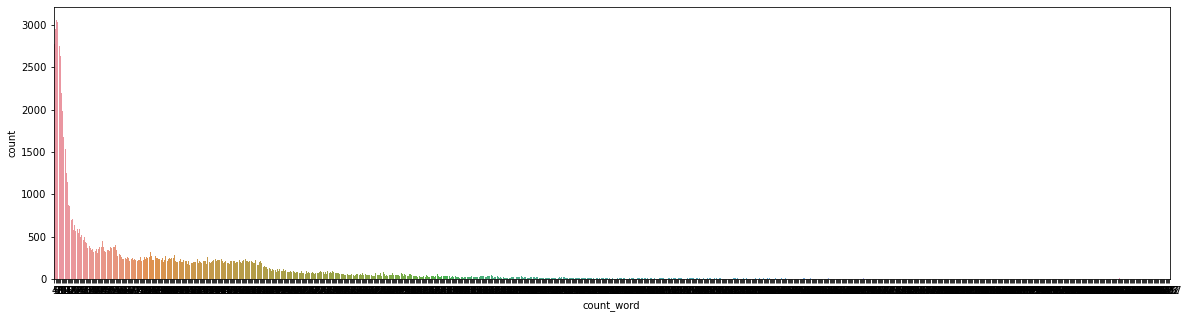

In [154]:
import seaborn as sns
from matplotlib import pyplot

X["count_word"] = X.text.apply(lambda x : len(x.split(' ')))

fig, ax = pyplot.subplots(figsize=(20,5))

sns.countplot(X["count_word"],ax=ax);

Pour éviter des séquences trop longue, le seuil maximum d'une phrase sera considéré à 40:

In [155]:
#df_X = df_X[df_X.count_word<=20]

#df_X["count_word"] = df_X.text.apply(lambda x : len(x.split(' ')))
#fig, ax = pyplot.subplots(figsize=(20,5))

#sns.countplot(df_X["count_word"],ax=ax)

Tokenisation:

In [156]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.tokenize import word_tokenize

#tfid = TfidfVectorizer(analyzer='word',
#                       tokenizer=word_tokenize,
#                       max_df=0.8,
#                       min_df=2,
#                       #ngram_range=(1,1),
#                       use_idf=True,
#                       smooth_idf=True,                       sublinear_tf=False,
#                       binary=True,
#                       max_features=10000
#                      )

#X = tfid.fit_transform(df_X['text'].squeeze()).todense()

#X.shape

Separer les données en train & text:

In [157]:
# Importer la classe train_test 
from sklearn.model_selection import train_test_split

# Séparer le jeu de données en données d'entraînement et données test 
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_text

,designation,description,productid,imageid,text,count_word
60735,Carte Postale Typo Aimer - Kiub,Carte postale tendance de la collection Typo d...,2825941333,1208783386,Carte Postale Typo Aimer - KiubCarte postale t...,52
9118,Garçon - Le Jeu De Plateau !,A propos : Il s¿agit d¿un jeu de cartes dans l...,89102802,856119038,Garçon - Le Jeu De Plateau !A propos : Il s¿ag...,66
55855,Royaume Des Animaux Ab À Asc,,197015072,936925976,Royaume Des Animaux Ab À Asc,6
42138,Piscine Jeu Adresse 237x152,0,2824252365,1166755995,Piscine Jeu Adresse 237x1520,4
10948,United States And European Union Auditor Indep...,,418466190,1017775450,United States And European Union Auditor Indep...,8
...,...,...,...,...,...,...
6265,Griottines - Coffret De 5 Cl,Griottines - Coffret de 5 cl Cerises Griottes ...,183256510,938718607,Griottines - Coffret De 5 ClGriottines - Coffr...,103
54886,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...,1Bouquet 7 têtes artificielles Pivoine Soie Fe...,4086048240,1289079205,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...,107
76820,Happy Easter Taies D'oreiller En Lin Coussin S...,Happy Easter taies d&#39;oreiller en lin Couss...,3992621069,1273354395,Happy Easter Taies D'oreiller En Lin Coussin S...,86
860,Pratique Chasse Camo Camping Imperméable Camou...,Pratique Camo chasse furtif étanche Camping Ca...,4231695757,1323296971,Pratique Chasse Camo Camping Imperméable Camou...,219


Tokeniser: texte -> sequence entier (index dans un dictionaire):

In [158]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=50000,
                                                )
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train_text.text)

Stocker le dictionnaire de correspondance:

In [159]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words


• Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences

In [160]:
X_train = tokenizer.texts_to_sequences(X_train_text.text)

X_test = tokenizer.texts_to_sequences(X_test_text.text)

• Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences

In [161]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [162]:
X_train

array([[  198, 10698, 40528, ...,     0,     0,     0],
       [ 2492,    10,    70, ...,     0,     0,     0],
       [ 3611,    17,   461, ...,     0,     0,     0],
       ...,
       [ 1802,  7702,  1366, ...,     0,     0,     0],
       [  268,  3140,  6942, ...,     0,     0,     0],
       [15137,  5659,   219, ...,     0,     0,     0]])

In [163]:
X_test

array([[  393,  1283,    70, ...,     0,     0,     0],
       [ 3270, 20700,    24, ...,     0,     0,     0],
       [  282,  1850,     9, ...,     0,     0,     0],
       ...,
       [  182,   268,   409, ...,     0,     0,     0],
       [  932,     1,   416, ...,     0,     0,     0],
       [22922,   994, 43185, ...,     0,     0,     0]])

In [186]:
# Dataset de notre jeu de données
text_train_set = tf.data.Dataset.from_tensor_slices((X_train,np.array([int(i) for i in y_train.values])))

text_test_set = tf.data.Dataset.from_tensor_slices((X_test,np.array([int(i) for i in y_test.values])))

In [187]:
# Ajouter la fonction load_image dans le pipeline des opérations. Séparer le résultat en lot de taille 32.
text_train_set = text_train_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)
#dataset = dataset.map(lambda x, y: [load_image(x), y[:-1], y[1:]]).batch(16).repeat(-1)

text_test_set = text_test_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)

In [188]:
# Définition d'un générateur python
def generator(text_set):
    iter_text = iter(text_set)
    while True:
        X_text, y_text = next(iter_text) #do not use this 'y_text' from text iterator!!! Tf does not recognise it and leads to bug during training

        yield [X_text], y_text

In [189]:
# Définition du générateur final.
gen_train = generator(text_train_set)

gen_test = generator(text_test_set)

In [202]:
import json 

with open('classes.json') as f:
    categories = json.load(f)

i = 0
y_dict = {}
for category in categories:
    y_train = y_train.replace(category,categories[category])
    y_test = y_test.replace(category,categories[category])
    y_dict[i] = category
    i+=1

In [170]:
#y_test

### Modèle RNN

In [190]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, RNN, GRUCell, Dense, LSTM, Dropout, GRU
from tensorflow.keras import Model

embedding_dim = 256
voc_size_inp = len(tokenizer.word_counts)+1


text_inputs = Input(shape=(None,), dtype='int32',name='input')
x = Embedding(voc_size_inp, embedding_dim, name= 'embed_' + filename)(text_inputs)
#x = GRU(128, return_sequences=True, name='gru_' + filename)(x)
x = GRU(128,return_sequences=True, name = 'GRU_' + filename)(x)
#x = Dense(1024, activation='relu', name='dense_1_' + filename)(x)
x = Dropout(0.3, name='dropout_1' + filename)(x)
x = GlobalAveragePooling1D(name='batchnorm' + filename)(x)
x = Dense(256, activation='relu', name='dense_2_' + filename)(x)
x = Dropout(0.3, name='dropout_2_' + filename)(x)
text_output = Dense(27, activation='softmax', name='output_' + filename)(x)

model = Model(text_inputs, text_output)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
embed_RNN_v5 (Embedding)     (None, None, 256)         47877376  
_________________________________________________________________
GRU_RNN_v5 (GRU)             (None, None, 128)         148224    
_________________________________________________________________
dropout_1RNN_v5 (Dropout)    (None, None, 128)         0         
_________________________________________________________________
batchnormRNN_v5 (GlobalAvera (None, 128)               0         
_________________________________________________________________
dense_2_RNN_v5 (Dense)       (None, 256)               33024     
_________________________________________________________________
dropout_2_RNN_v5 (Dropout)   (None, 256)               0   

In [191]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [192]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         mode='max',
                                         restore_best_weights=True)


checkpoint = callbacks.ModelCheckpoint(filepath= model_path + filename + '.hdf5', 
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max',
                                       save_freq='epoch')

red_on_plateau = callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                             patience=2, 
                                             factor=0.1,
                                             verbose=1)

In [193]:
#model.load_weights(model_path + filename + '.hdf5')

model.fit(gen_train, steps_per_epoch=int(len(y_train.values)/32), validation_data = gen_test, validation_steps = int(len(y_test.values)/32),epochs=10, workers=1)

Epoch 1/10


InvalidArgumentError:  Received a label value of 2705 which is outside the valid range of [0, 27).  Label values: 1320 1281 2403 1302 10 1320 2705 1300 1560 1280 2060 2522 1280 2060 1920 1560 2582 1920 1940 2403 40 1140 1140 1920 1920 2522 2060 2280 2403 2280 2585 2583
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-193-4f7949b22ba8>:3) ]] [Op:__inference_train_function_6672475]

Function call stack:
train_function


In [ ]:
#model.load_weights(model_path + filename + '.hdf5')
#history = model.fit(X_train, y_train, batch_size = 32, epochs=30, validation_data = (X_test, y_test),callbacks=[early_stopping, checkpoint,red_on_plateau])

In [ ]:
model.save(model_path + filename + '.hdf5')

In [ ]:
saved_model = tf.keras.models.load_model(model_path + filename + '.hdf5')
#saved_model.load_weights(model_path + filename + '.hdf5')
saved_model.summary()

In [ ]:
y_pred_prob = saved_model.predict(X_test)

In [ ]:
y_pred = [y_dict[i] for i in np.argmax(y_pred_prob, axis=1)]
y_test_ = [y_dict[i] for i in y_test]

In [ ]:
y_pred #2905,1281,2060

In [ ]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test_,y_pred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
conf_matx(y_test_,y_pred)

In [ ]:
y_pred_prob = model.predict(X_test)

In [ ]:
y_pred = [y_dict[i] for i in np.argmax(y_pred_prob, axis=1)]
y_test_ = [y_dict[i] for i in y_test]

y_pred

In [ ]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test_,y_pred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
conf_matx(y_test_,y_pred)

In [ ]:
df_csv = pd.read_csv('predictions.csv',index_col=0)
df_csv

In [ ]:
#df_total = pd.DataFrame(index = y.index.to_list())
#df_real = pd.DataFrame(y.to_list(),index = y.index.to_list(),columns = ['real'])
df_pred = pd.DataFrame(y_pred,index = y_test.index.to_list(),columns = [filename])

In [ ]:
df = pd.concat([df_csv,df_pred],axis=1)
df

In [ ]:
df.to_csv('predictions.csv')

In [ ]:
df.dropna(subset=['RNN_v3','RNN_v4'],inplace=True)

In [ ]:
df

In [ ]:
new_y_pred = []
for x, y, z in zip(df['real'].to_list(), df['RNN_v3'].to_list(), df['RNN_v4'].to_list()):
    if y == x or z == x:
        new_y_pred.append(str(x))
    else:
        new_y_pred.append(str(z))

In [ ]:

print(classification_report(df['real'].map(str).to_list(),new_y_pred))